# Biodiversity in National Parks
## 1. Introduction
This project involves the analysis of data on endangered species in a variety of U.S. national parks.
The goals of this work are two:
- perform analysis on the conservation status of these species
- identify if there is a relationship between the conservation status and the type of species that become endangered

**Data source:**

Data, provided by [Codecademy.com](https://www.codecademy.com), are inspired by real data from the National Parks Service, but they are mostly fictional.

## 2. Import libraries
To begin with, the modules that will be used in this project include `pandas` to manipulate and analyze data in a tabular format, `Matplotlib` and `seaborn` for data visualization, and `SciPy` to run hypothesis tests.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## 3. Import data
The data that will be used in this project are concentrated into the following csv files:
+ *observations.csv* - holds recorded sightings of different species at several national parks for the past 7 days
+ *species_info.csv* - contains data about different species and their conservation status

The csv files are opened using the `pandas` `read_csv()` method, and thus creating two DataFrames, named `observations` and `species`. The first few rows of each DataFrame are displayed below by using the `.head()` method. 

The datasets provided have the following columns of data:

`observations`:

+ `scientific_name` - the scientific name of each species
+ `park_name` - park where species were found
+ `observations` - the number of times each species was observed at park

`species`:

+ `category` - class of animal
+ `scientific_name` - the scientific name of each species
+ `common_name` - the common names of each species
+ `conservation_status` - each species’ current conservation status

The two datasets are linked by a common column: `scientific_name`.

In [87]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
print('Table 1: Observations')
display(observations.head(10))
print('Table 2: Species')
display(species.head(10))

Table 1: Observations


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


Table 2: Species


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


## 4. Inspect data
Before starting any analysis on the data, it is important to inspect each of the datasets to have a sense of their size, to see what kind of variables they contain, to check for unique values, missing or null values etc.
### 4.1. Shape of each dataset
The size of the two DataFrames can be estimated with the `.shape` attribute. 

In [88]:
print(f'Observations shape: {observations.shape}')
print(f'Species shape: {species.shape}')

Observations shape: (23296, 3)
Species shape: (5824, 4)


Although, the `observations` dataset has as few as 3 columns, it is a large one having 23296 data values. The `species` dataset consists of 4 columns and 5824 data values. Additionally, it can be observed that the `observations` DataFrame is exactly 4 times larger than the `species` dataset.

### 4.2. Variable types
In data analysis it is important to know the type of data we encounter. In `observations` dataset the `observations` variable is a quantitative variable, as it consists of integer values, and the rest of them are categorical. In `species` dataset, all of the variables are categorical.

### 4.3. Distinct values
The number of distinct values for each variable can be seen using the `.nunique()` function of the `pandas` module as shown below.

In [89]:
display(observations.nunique())
display(species.nunique())

scientific_name    5541
park_name             4
observations        304
dtype: int64

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

The `park_name` variable has 4 unique values indicating 4 different parks. Therefore, the reason why the `observations` DataFrame is 4 time larger than the `species` DataFrame is because each species was recorded for each of the 4 parks.

The variables `park_name`, `category` and `conservation_status` have only a few distinct values, so it is easier to examine them using the `unique()` function.

In [90]:
display(observations.park_name.unique())
display(species.category.unique())
display(species.conservation_status.unique())

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### 4.4. Null values
The `conservation_status` column includes null data values. These values probably indicate the species that do not need some kind of intervention regarding conservation. The rest of the columns of the `species` dataset should be checked for null values as well as the `observations` dataset. 

In [91]:
display(species.isna().any())
observations.isna().any()

category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

scientific_name    False
park_name          False
observations       False
dtype: bool

As shown above, the two datasets do not have null values, except for `species` `conservation_status` column. Now, the data seem ready for analysis. 

## 5. Data analysis
### 5.1. Conservation status distribution
One question that comes to mind when looking over the `species` dataset is:
- What is the distribution of conservation status for species?

The species logged with null values can be classified as species having the lowest risk of endangerement and do not need intervention. The number of these species is 5633 as shown below:

In [92]:
no_inter_species = species.conservation_status.isna().sum()
no_inter_species

5633

The distribution of the species having a conservation status that is not null can be estimated with the `.value_counts()` method.

In [93]:
status_count = species['conservation_status'].value_counts()
status_count

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

When considering only the species needing conservation, most of them are classified as `'Species of Concern'` - species at low risk, conserved to prevent being threatened. The species listed as `'Endangered'` are facing high risk of extinction and they are more than the ones listed as `'Threatened'`, which are species that are likely to become endangered in the foreseeable future. Moreover, there are a few species listed as `'In Recovery'`. These species are formerly endangered species that have shown an increase in population. 

### 5.2. Species distribution
It is important to consider the types of species that are in a state of conservation. For this purpose, a contingency table displaying the frequency distribution of the variables `conservation_status` and `category` will be created, using `pandas` `.crosstab()` function.

In [94]:
Xtab = pd.crosstab(species.category, species.conservation_status)
Xtab

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


The majority of species listed as `'Species of Concern'` and `'In Recovery'` are birds. Most endangered species are in the `'Mammal'` category, while the most threatened are fishes.

The following visualization can display effectively the results of the contingency table.

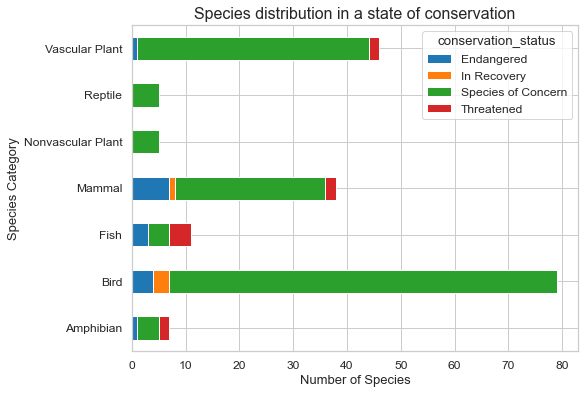

In [95]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)
stackedbar = Xtab.plot(kind = 'barh', figsize=(8,6), stacked=True)
stackedbar.set_xlabel('Number of Species', fontsize=13)
stackedbar.set_ylabel('Species Category', fontsize=13)
stackedbar.set_title('Species distribution in a state of conservation', fontsize=16)
plt.savefig('Species distribution.png', bbox_inches='tight')
plt.show()

Additional observations from the contingency table and the graph:
- For each category of species the predominant conservation status is `'Species of Concern'`.
- Amphibians, fishes, mammals and vascular plants have a `'Threatened'` status.
- An amphibian, a vascular plant, some birds, fishes and mammals are listed as `'Endangered'`.
- There are 3 birds and a mammal in recovery.
- Species from the `'Nonvascular Plant'` and `'Reptile'` category have only a `'Species of Concern'` status.

### 5.3. Total species under protection
For each type of species, the number of species that are in a state of conservation can be an indication of the type most prone to endangerement. Therefore, a new DataFrame will be formed by counting the number of species, that are under protection, for each category. 

In [96]:
category_count = Xtab.sum(axis=1).reset_index(name='total')
category_count

,category,total
0,Amphibian,7
1,Bird,79
2,Fish,11
3,Mammal,38
4,Nonvascular Plant,5
5,Reptile,5
6,Vascular Plant,46


The `'Bird'` category has the most species in a state of conservation, followed by the `'Vascular Plant'` category, followed by the `'Mammal'`. The information of this DataFrame can be conveyed better through a bar plot.

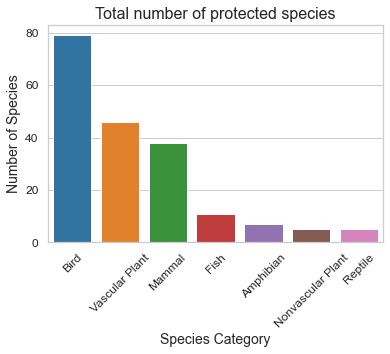

In [97]:
bar = sns.barplot(data=category_count, x='category', y='total', order=category_count.sort_values('total', ascending=False).category)
bar.set_title('Total number of protected species', fontsize=16)
bar.set_xticklabels(bar.get_xticklabels(),rotation=45)
bar.set_ylabel('Number of Species', fontsize=14)
bar.set_xlabel('Species Category', fontsize=14)
plt.savefig('Number of protected species.png', bbox_inches='tight')
plt.show()

### 5.4. Rate of protection
Counting the number of species, for each category, that are in a state of conservation in order to draw conclusions about the degree of risk of each type of species, is not the most accurate way. That is because the number of species that are not in a state of conservation was not taken into account. Thus, the percentage of protected species should be calculated instead.

In [98]:
# estimate unprotected species
unprotected = species.category[species['conservation_status'].isnull()].value_counts().sort_index().values

# add unprotected as a new column in the category_count dataframe
category_count['number_of_unprotected'] = unprotected

# rename existing column
category_count.rename(columns={'total':'number_of_protected'}, inplace=True)

# calculate rate of protection
category_count['rate_of_protection'] = category_count.number_of_protected / \
                                            (category_count.number_of_protected + category_count.number_of_unprotected) * 100
category_count

,category,number_of_protected,number_of_unprotected,rate_of_protection
0,Amphibian,7,73,8.750000
1,Bird,79,442,15.163148
2,Fish,11,116,8.661417
3,Mammal,38,176,17.757009
4,Nonvascular Plant,5,328,1.501502
5,Reptile,5,74,6.329114
6,Vascular Plant,46,4424,1.029083


For an easier interpretation of the results, the rate of protection for each species category can be visualized through a bar plot. 

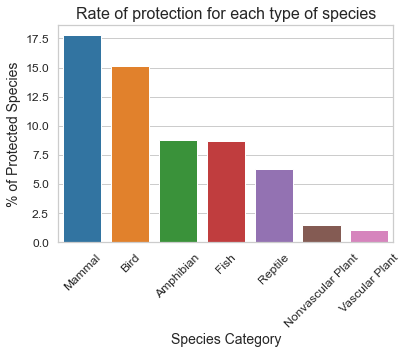

In [106]:
g = sns.barplot(y='rate_of_protection', x='category', data=category_count, order=category_count.sort_values('rate_of_protection', ascending=False).category)
g.set_title('Rate of protection for each type of species', fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel('% of Protected Species', fontsize=14)
g.set_xlabel('Species Category', fontsize=14)
plt.savefig('Rate of protection.png', bbox_inches='tight')
plt.show()

The `'Mammal'` category has the highest rate of protection about 17.8%, the `'Bird'` category follows with a rate of about 15%, followed by the `'Amphibian'` and `'Fish'` categories with similar rates of about 8.7%. So, even though the birds, vascular plants and mammals, include more protected species, the mammals and the birds are the types of species exhibiting the highest rates of protection, and thus they are more likely to be endangered.

### 5.5. Differences between species and their conservation status
It is important to consider if the differences between species and their conservation status are significant. The answer depends on the categories of species being compared. If all the categories will be compared to investigate if the differences between them and their conservation status are significant, then the null hypothesis, based on the previous findings, can be that they are significant. To test this hypothesis, a Chi-Square test with a significance threshold of 0.05 can be implemented using the `chi2_contingency()` function from the `scipy.stats`.

In [100]:
# create a contingency_table
contingency_table = category_count.drop('rate_of_protection', axis=1).set_index('category')

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

3.095911909904608e-98
significant


The null hypothesis is true, as the p-value is very small, indicating that the differences between all types of species and their conservation status are significant.

However, when comparing species with similar rates of protections such as mammals and birds or amphibians and fishes, the expected finding is that they do not differ significantly.

In [101]:
# create a contingency_table
mammal_bird = contingency_table.loc[['Mammal','Bird']]
display(mammal_bird)

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(mammal_bird)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

,number_of_protected,number_of_unprotected
category,,
Mammal,38,176
Bird,79,442


0.445901703047197
not significant


Species of the `'Mammal'` and the `'Bird'` category are not significantly different regarding their conservation status as their p-value is much larger than the significance threshold.

One more test to run is between species that do not have close rates of protection, such as birds and vascular plants. The null hypothesis could be the differences between these types of species and their conservations status are significant.

In [107]:
# create a contingency_table
bird_plant = contingency_table.loc[['Bird','Vascular Plant']]
display(bird_plant)

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(bird_plant)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

,number_of_protected,number_of_unprotected
category,,
Bird,79,442
Vascular Plant,46,4424


9.296288431402029e-84
significant


Indeed, the very small probability value indicates that the differences between species of the `'Bird'` and the `'Vascular Plant'` category and their conservation status are significant.

### 5.6. Most and least observed species by park
Data analysis will procceed by taking into account not only the `species` but also the `observations` dataset. In the `observations` DataFrame the sightings of different species have been logged at several national parks for the past 7 days. The analysis will begin by counting the observations for each of the species by park. This will be accomplished with the `.groupby()` function. Also, the observations will be sorted in a descending order.

In [103]:
obs = observations.groupby(['park_name','scientific_name'])['observations'].sum()\
                        .reset_index().sort_values('observations', ascending=False)
obs

,park_name,scientific_name,observations
13534,Yellowstone National Park,Holcus lanatus,805
16075,Yellowstone National Park,Streptopelia decaocto,771
15261,Yellowstone National Park,Puma concolor,753
15191,Yellowstone National Park,Procyon lotor,745
13637,Yellowstone National Park,Hypochaeris radicata,726
...,...,...,...
10066,Great Smoky Mountains National Park,Sambucus mexicana,12
10541,Great Smoky Mountains National Park,Strix occidentalis,11
9788,Great Smoky Mountains National Park,Rana sierrae,11
6896,Great Smoky Mountains National Park,Collomia tinctoria,10


Next step, is find which species were spotted the most and the least at each park. Firstly, an empty list will be created. Then, for each park the species with the most and the least observations will be located and appended to the empty list. At last, a new DataFrame will be formed using `pandas` `.concat()` method.

In [104]:
lst = []
# iterate over each distinct park
for park in set(obs.park_name):
    # create a dataframe of the observations of each park
    df = obs[obs.park_name == park]
    # merge df with the species dataframe
    df1 = pd.merge(df, species, on='scientific_name', how='inner')
    # extract the rows with the most and least observations
    df2 = df1[df1.conservation_status.notnull()].iloc[[0,-1]]
    # add a column corresponding to the most and the least observed species
    df2['frequency'] = ['most_spotted', 'least_spotted']
    # set the frequency column as index
    df2 = df2.set_index('frequency')
    # append dataframe into the empty list
    lst.append(df2)

# create a new dataframe   
most_and_least = pd.concat(lst)    
most_and_least

,park_name,scientific_name,observations,category,common_names,conservation_status
frequency,,,,,,
most_spotted,Yosemite National Park,Myotis lucifugus,396,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
least_spotted,Yosemite National Park,Noturus baileyi,31,Fish,Smoky Madtom,Endangered
most_spotted,Yellowstone National Park,Myotis lucifugus,679,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
least_spotted,Yellowstone National Park,Grus americana,57,Bird,Whooping Crane,Endangered
most_spotted,Bryce National Park,Myotis lucifugus,298,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
least_spotted,Bryce National Park,Vermivora bachmanii,20,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
most_spotted,Great Smoky Mountains National Park,Myotis lucifugus,174,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
least_spotted,Great Smoky Mountains National Park,Rana sierrae,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered


For better display of results, the new DataFrame is separated into two, one for the most observed and one for the least observed species under protection.

In [105]:
most_observed = most_and_least.loc['most_spotted'].reset_index(drop=True)
least_observed = most_and_least.loc['least_spotted'].reset_index(drop=True)
display(most_observed)
display(least_observed)

,park_name,scientific_name,observations,category,common_names,conservation_status
0,Yosemite National Park,Myotis lucifugus,396,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
1,Yellowstone National Park,Myotis lucifugus,679,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
2,Bryce National Park,Myotis lucifugus,298,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
3,Great Smoky Mountains National Park,Myotis lucifugus,174,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern


,park_name,scientific_name,observations,category,common_names,conservation_status
0,Yosemite National Park,Noturus baileyi,31,Fish,Smoky Madtom,Endangered
1,Yellowstone National Park,Grus americana,57,Bird,Whooping Crane,Endangered
2,Bryce National Park,Vermivora bachmanii,20,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
3,Great Smoky Mountains National Park,Rana sierrae,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered


Results:
- The `'Little Brown Bat'` listed as `'Species of Concern'` was the species most found in all national parks in the last 7 days. 
- The `'Whooping Crane'` and the `'Smoky Madtom'` were the endangered species found in the previous analysis as the least observed, respectively, at the `'Yellowstone National Park'` and the `'Yosemite National Park'`. 
- The endangered bird `'Bachman's Warbler'` was the least observed species in the `'Bryce National Park'`. 
- The amphibian `'Sierra Nevada Yellow-Legged Frog'` was the endangered species least found in the `'Great Smoky Mountains National Park'`.

## 6. Conclusions
In this project, data were analyzed for different species from four national parks with the aim of investigating the conservation status of these species and to finding patterns to the types of species that become endangered. In order to achieve these goals, the following questions were addressed:

- What is the distribution of conservation status for species?

There are 5333 species facing no risk of endangerement, and 191 species with a state of conservation. Of the 191 species, the 161 are species of concern, 16 are endangered, 10 are threatened and 4 are in recovery.

- What is the distribution of species that are in a state of conservation?

The majority of species listed as `'Species of Concern'` and `'In Recovery'` are birds. Most endangered species are in the `'Mammal'` category, while the most threatened are fishes.

- Are certain types of species more likely to be endangered?

Species in the `'Mammal'` and the `'Bird'` category are more likely to be endangered.

- Are the differences between species and their conservation status significant?

When comparing all categories of species together, the result is that there are significant differences between the species and their conservation status. However, when comparing separate categories, the result may differ. For example, the differences between mammals and birds and their conservations status are not significant, but they are between birds and vascular plants.

- Which protected species were spotted the most at each park in the last 7 days?

The `'Little Brown Bat'` listed as `'Species of Concern'` was the mammal most found in all national parks in the last 7 days. 
  

- Which protected species were spotted the least at each park in the last 7 days?

  - At `'Yosemite National Park'` the endangered fish `'Smoky Madtom'`.
  - At `'Great Smoky Mountains National Park'` the endangered amphibian `'Sierra Nevada Yellow-Legged Frog'`.
  - At `'Yellowstone National Park'` the endangered bird `'Whooping Crane'`.
  - At `'Bryce National Park'` the endangered bird `'Bachman's Warbler'`.